In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas import Series
import statsmodels.api as sm
from scipy import stats
from matplotlib.dates import DateFormatter
import scipy.stats as scp
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing

In [34]:
df= pd.read_csv("F:\Projects\AUS-Petroleum-Exploration\Group_Petroleum_Data.csv")

In [35]:
df

,Time Period,Total Petroleum Exploration
0,1974-Q3,25600000
1,1974-Q4,22800000
2,1975-Q1,17200000
3,1975-Q2,16600000
4,1975-Q3,14000000
...,...,...
189,2021-Q4,351600000
190,2022-Q1,255000000
191,2022-Q2,245100000
192,2022-Q3,226100000


In [36]:
print(df.shape)

(194, 2)


In [37]:
print(df.dtypes)

Time Period                    object
Total Petroleum Exploration     int64
dtype: object


In [38]:
print(df.isnull().sum())

Time Period                    0
Total Petroleum Exploration    0
dtype: int64


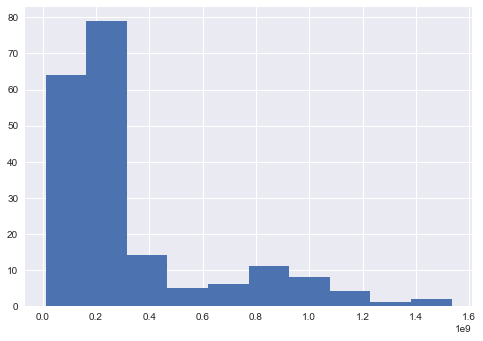

In [39]:
plt.hist(df['Total Petroleum Exploration'])
plt.show()

In [42]:
df.rename(columns={'Total Petroleum Exploration' : 'Total_Petroleum_Exploration', 'Time Period' : 'Time_Period'}, inplace= True)

In [43]:
df.describe

<bound method NDFrame.describe of     Time_Period  Total_Petroleum_Exploration
0       1974-Q3                     25600000
1       1974-Q4                     22800000
2       1975-Q1                     17200000
3       1975-Q2                     16600000
4       1975-Q3                     14000000
..          ...                          ...
189     2021-Q4                    351600000
190     2022-Q1                    255000000
191     2022-Q2                    245100000
192     2022-Q3                    226100000
193     2022-Q4                    239800000

[194 rows x 2 columns]>

[Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Total_Petroleum_Exploration'),
 Text(0.5, 1.0, 'TotalPetroleum Exploration')]

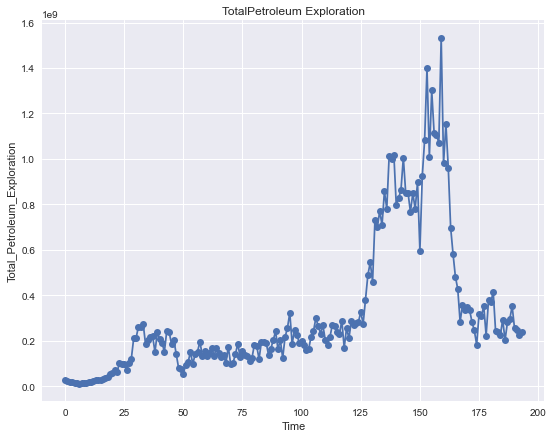

In [44]:
#Plotting the time series data

plt.style.use('seaborn')

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(df.index.values, df['Total_Petroleum_Exploration'],'-o')
ax.set(xlabel="Time",ylabel="Total_Petroleum_Exploration",title="Total Petroleum Exploration")




# There are two different periods of time that the series are bouncing around two different mean levels. Although there is not a trend for each 
# time period, as a whole the mean level is changing through the time. Seasonality and changing variance are obvious from the series. 
# To see the autocorrelation structure clearly, we need to filtrate out the effect of seasonality.

d:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


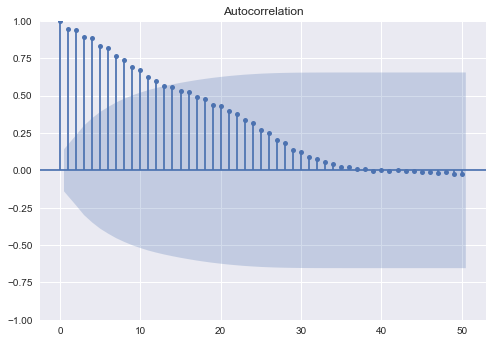

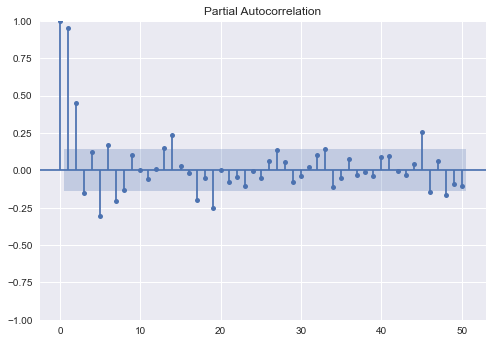

In [45]:
#Creating the ACF and PACF plots of the landings series

sm.graphics.tsa.plot_acf(df.Total_Petroleum_Exploration, lags=50);
sm.graphics.tsa.plot_pacf(df.Total_Petroleum_Exploration, lags=50);

# Seasonality and existence of trend are obvious from the ACF and PACF plots

In [46]:
# First fit a plain model with only the first seasonal difference with order D = 1 
# and see if we can get rid of the seasonal trend effect
# by inspecting the autocorrelation structure of the residuals.

model1=sm.tsa.statespace.SARIMAX(endog=df['Total_Petroleum_Exploration'],order=(0,0,0),seasonal_order=(0,1,0,4),trend='ct',enforce_invertibility=False)
results1=model1.fit()
print(results1.summary())

                                    SARIMAX Results                                    
Dep. Variable:     Total_Petroleum_Exploration   No. Observations:                  194
Model:                    SARIMAX(0, 1, 0, 12)   Log Likelihood               -3792.632
Date:                         Thu, 25 May 2023   AIC                           7591.265
Time:                                 23:42:34   BIC                           7600.877
Sample:                                      0   HQIC                          7595.161
                                         - 194                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.319e+07   1.19e+08      0.786      0.432   -1.39e+08    3.26e+08
drift      -8.451e+05   7.65e+05     -1.105      0.269   -2

In [72]:
# First fit a plain model with only the first seasonal difference with order D = 1 
# and see if we can get rid of the seasonal trend effect
# by inspecting the autocorrelation structure of the residuals.

model1=sm.tsa.statespace.SARIMAX(endog=df['Total_Petroleum_Exploration'],order=(0,0,0),seasonal_order=(0,1,0,4),trend='ct',enforce_invertibility=False)
results1=model1.fit()
print(results1.summary())

                                    SARIMAX Results                                    
Dep. Variable:     Total_Petroleum_Exploration   No. Observations:                  194
Model:                     SARIMAX(0, 1, 0, 4)   Log Likelihood               -3838.369
Date:                         Thu, 25 May 2023   AIC                           7682.737
Time:                                 23:59:54   BIC                           7692.478
Sample:                                      0   HQIC                          7686.683
                                         - 194                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.913e+07   5.15e+07      0.566      0.571   -7.17e+07     1.3e+08
drift      -2.563e+05   3.41e+05     -0.752      0.452   -9

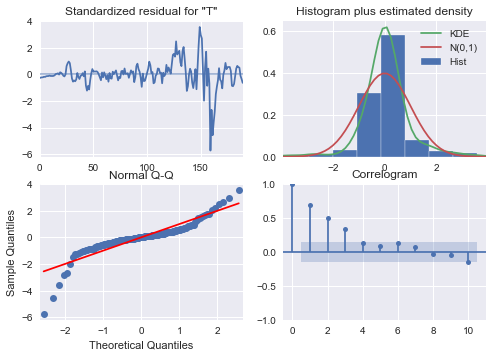

In [73]:
#SARIMAX has an automatic method called plot_diagnostics to get the diagnostic plots for the residuals

results1.plot_diagnostics();

In [74]:
#Getting the residuals for the fitted SARIMA model
residuals1 = pd.DataFrame(results1.resid)

#Standardising the residuals for plotting
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fitting the data on the scaler object to get the standardised residuals
scaled_df1 = pd.DataFrame(scaler.fit_transform(residuals1))
scaled_df1.head()

,0
0,-0.027131
1,-0.046824
2,-0.084408
3,-0.086825
4,-0.283360


In [75]:
df

,Time_Period,Total_Petroleum_Exploration
0,1974-Q3,25600000
1,1974-Q4,22800000
2,1975-Q1,17200000
3,1975-Q2,16600000
4,1975-Q3,14000000
...,...,...
189,2021-Q4,351600000
190,2022-Q1,255000000
191,2022-Q2,245100000
192,2022-Q3,226100000


In [76]:
residuals1

,0
0,-3.272103e+06
1,-6.072103e+06
2,-1.141580e+07
3,-1.175950e+07
4,-3.970320e+07
...,...
189,7.851264e+07
190,7.196894e+07
191,-1.567475e+07
192,-5.011845e+07


In [65]:
len(residuals1)

194

In [67]:
residuals1.values

array([[-6.67449469e+07],
       [-6.95449469e+07],
       [-7.42998810e+07],
       [-7.40548151e+07],
       [-7.58097492e+07],
       [-7.27646833e+07],
       [-7.63196174e+07],
       [-7.49745515e+07],
       [-7.13294856e+07],
       [-7.04844197e+07],
       [-6.72393538e+07],
       [-6.39942879e+07],
       [-8.61492220e+07],
       [-7.73041561e+07],
       [-7.29590902e+07],
       [-6.98140244e+07],
       [-6.41689585e+07],
       [-5.86238926e+07],
       [-4.81788267e+07],
       [-3.36337608e+07],
       [-3.16886949e+07],
       [-1.93436290e+07],
       [-2.95985631e+07],
       [ 7.74650280e+06],
       [ 3.39156869e+06],
       [-1.46336542e+06],
       [-2.68182995e+07],
       [ 3.52676637e+06],
       [ 2.11718323e+07],
       [ 1.04916898e+08],
       [ 1.01861964e+08],
       [ 1.38307030e+08],
       [ 1.36752096e+08],
       [ 1.39297162e+08],
       [ 5.93422276e+07],
       [ 3.76872935e+07],
       [ 5.50323594e+07],
       [ 6.01774253e+07],
       [ 1.9

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time_Period                  194 non-null    object
 1   Total_Petroleum_Exploration  194 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [66]:
(len(df.index))

194

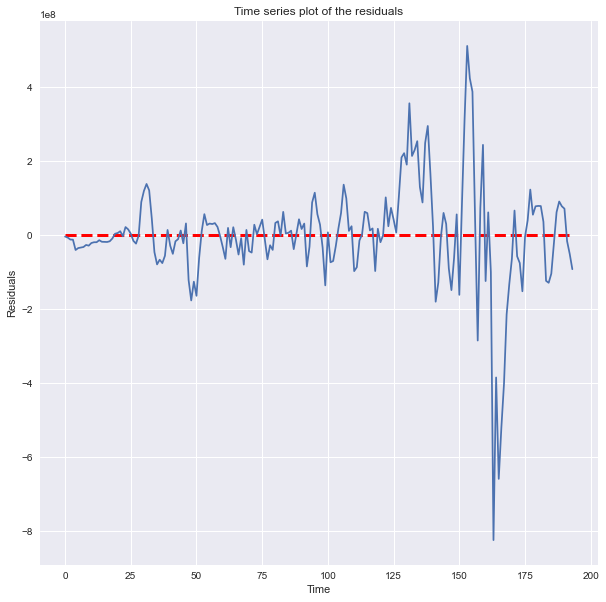

In [77]:
residuals1.index = df.index

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df.index.values, residuals1.values, '-')
ax.set(xlabel="Time", ylabel="Residuals", title="Time series plot of the residuals")

# To get the horizontal zero line
xmin = df.index.min()
xmax = df.index.max()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='red', linestyle='--', lw=3)


d:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


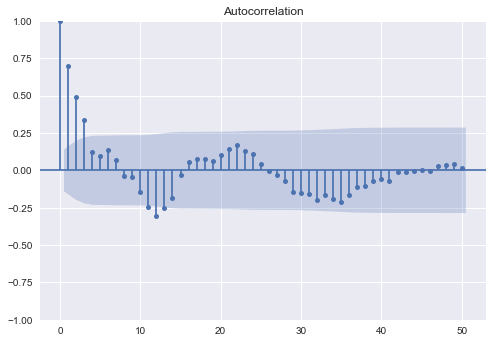

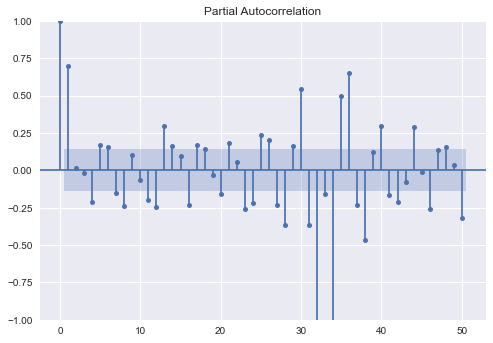

In [78]:
#To visualise the ACF, PACF plots separately, the manual codes can be used

#Creating the ACF and PACF plots of the residual series

sm.graphics.tsa.plot_acf(residuals1, lags=50);
sm.graphics.tsa.plot_pacf(residuals1, lags=50);

# From the time series plot, we can conclude that we got rid of the trend. Seasonal autocorrelations are seen clearly in 
# ACF and PACF now at the lags corresponding to the periods. 
# We have one significant correlation at the first seasonal lag in both ACF and PACF.

In [79]:
#So, we will add the SARMA(1,1) component and see if we get rid of seasonal component.

model2=sm.tsa.statespace.SARIMAX(endog=df['Total_Petroleum_Exploration'],order=(0,0,0),seasonal_order=(1,1,1,4),trend='ct',enforce_invertibility=False)
results2=model2.fit()
print(results2.summary())

                                    SARIMAX Results                                    
Dep. Variable:     Total_Petroleum_Exploration   No. Observations:                  194
Model:                   SARIMAX(1, 1, [1], 4)   Log Likelihood               -3836.822
Date:                         Fri, 26 May 2023   AIC                           7683.645
Time:                                 00:00:27   BIC                           7699.880
Sample:                                      0   HQIC                          7690.222
                                         - 194                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.913e+07    503.116   5.79e+04      0.000    2.91e+07    2.91e+07
drift      -2.563e+05   7.75e+04     -3.307      0.001   -4

In [80]:
#Getting the residuals for the fitted SARIMA model
residuals2 = pd.DataFrame(results2.resid)

#Standardising the residuals for plotting
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fitting the data on the scaler object to get the standardised residuals
scaled_df = pd.DataFrame(scaler.fit_transform(residuals2))
scaled_df.head()

,0
0,-0.036541
1,-0.056396
2,-0.094288
3,-0.096725
4,-0.290376


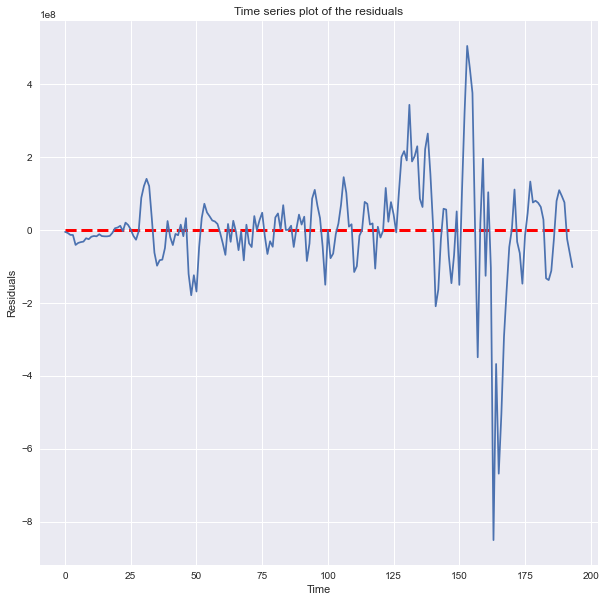

In [83]:
residuals2.index = df.index

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df.index.values, residuals2.values, '-')
ax.set(xlabel="Time", ylabel="Residuals", title="Time series plot of the residuals")

# To get the horizontal zero line
xmin = df.index.min()
xmax = df.index.max()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='red', linestyle='--', lw=3)


d:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


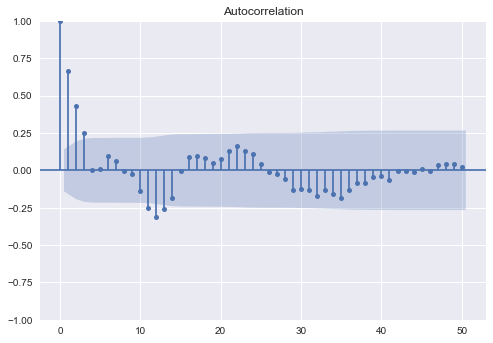

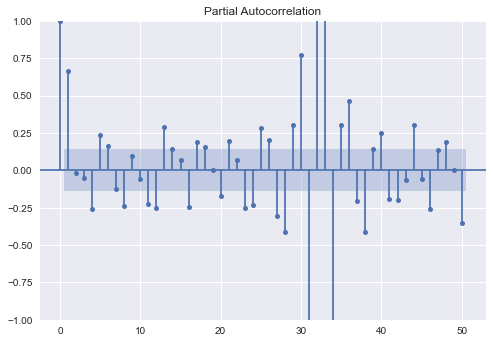

In [84]:
#To visualise the ACF, PACF plots separately, the manual codes can be used

#Creating the ACF and PACF plots of the residual series

sm.graphics.tsa.plot_acf(residuals2, lags=50);
sm.graphics.tsa.plot_pacf(residuals2, lags=50);

# Although we have one significant correlation at the first seasonal lag in PACF, we can conclude that 
# the seasonality is filtered out.
# The significant correlation in PACF would be due to the change point in the series.

# Now, we will specify the orders of ARIMA component. The first ordinary correlation in ACF is highly significant, and after a gap, 
# there are four significant correlations before the first seasonal lag. Also, there is a jagged pattern in PACF. This is an indication of
# trend but it's not apparent. This would be due to the highly changing variance. So, it would help to apply a transformation at this stage. 


In [86]:
# So, we will apply the log transformation and see if we can see the trend more clearly.

df_log = pd.DataFrame(np.log(df.Total_Petroleum_Exploration))


In [88]:
model3=sm.tsa.statespace.SARIMAX(endog=df_log['Total_Petroleum_Exploration'],order=(0,0,0),seasonal_order=(1,1,1,4),trend='ct',enforce_invertibility=False)
results3=model3.fit()
print(results3.summary())

                                    SARIMAX Results                                    
Dep. Variable:     Total_Petroleum_Exploration   No. Observations:                  194
Model:                   SARIMAX(1, 1, [1], 4)   Log Likelihood                 -79.243
Date:                         Fri, 26 May 2023   AIC                            168.485
Time:                                 00:03:21   BIC                            184.720
Sample:                                      0   HQIC                           175.062
                                         - 194                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1895      0.318      0.595      0.552      -0.435       0.814
drift         -0.0014      0.002     -0.602      0.547     

In [89]:
#Getting the residuals for the fitted SARIMA model
residuals3 = pd.DataFrame(results3.resid)

#Standardising the residuals for plotting
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fitting the data on the scaler object to get the standardised residuals
scaled_df = pd.DataFrame(scaler.fit_transform(residuals3))
scaled_df.head()

,0
0,6.910056
1,6.861595
2,6.744268
3,6.730005
4,-0.477309


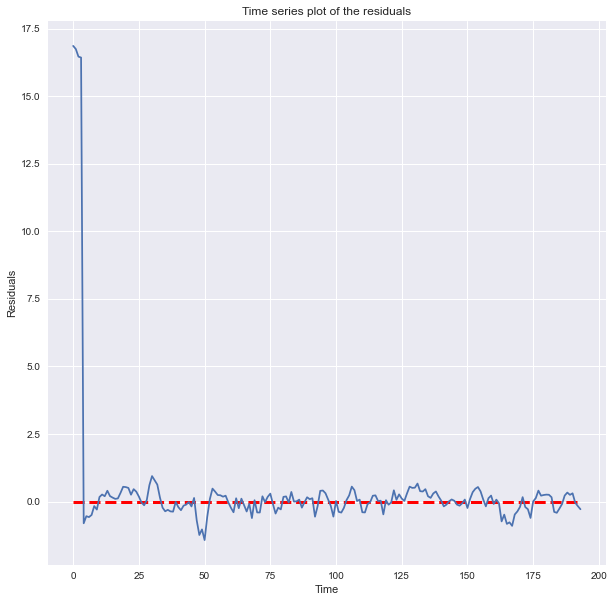

In [91]:
residuals3.index = df.index

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df.index.values, residuals3.values, '-')
ax.set(xlabel="Time", ylabel="Residuals", title="Time series plot of the residuals")

# To get the horizontal zero line
xmin = df.index.min()
xmax = df.index.max()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='red', linestyle='--', lw=3)


d:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


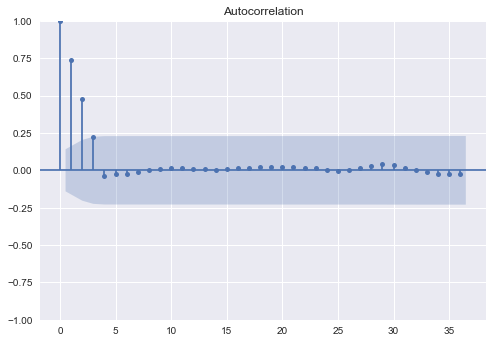

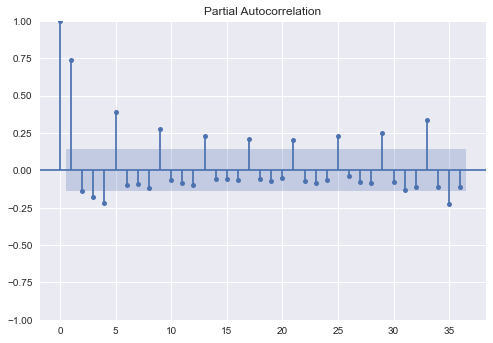

In [92]:
#To visualise the ACF, PACF plots separately, the manual codes can be used

#Creating the ACF and PACF plots of the residual series

sm.graphics.tsa.plot_acf(residuals3, lags=36);
sm.graphics.tsa.plot_pacf(residuals3, lags=36);

# The variation in the residuals decreased after the transformation. 
# We have a very high correlation at the first lag of PACF and nearly all the correlations before the first 
# seasonal lag are significant in ACF. So, we need to take the first ordinary difference to get rid of this trend 
# effect before going on with the specification of ARMA orders.

In [93]:
model4=sm.tsa.statespace.SARIMAX(endog=df_log['Total_Petroleum_Exploration'],order=(0,1,0),seasonal_order=(1,1,1,4),trend='ct',enforce_invertibility=False)
results4=model4.fit()
print(results4.summary())

                                      SARIMAX Results                                      
Dep. Variable:         Total_Petroleum_Exploration   No. Observations:                  194
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 4)   Log Likelihood                  -3.266
Date:                             Fri, 26 May 2023   AIC                             16.533
Time:                                     00:05:43   BIC                             32.742
Sample:                                          0   HQIC                            23.099
                                             - 194                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0187      0.018      1.009      0.313      -0.018       0.055
drift         -0.0002      

d:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [94]:
#Getting the residuals for the fitted SARIMA model
residuals4 = pd.DataFrame(results4.resid)

#Standardising the residuals for plotting
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fitting the data on the scaler object to get the standardised residuals
scaled_df = pd.DataFrame(scaler.fit_transform(residuals4))
scaled_df.head()

,0
0,12.195853
1,-0.124282
2,-0.243257
3,-0.066413
4,-6.288865


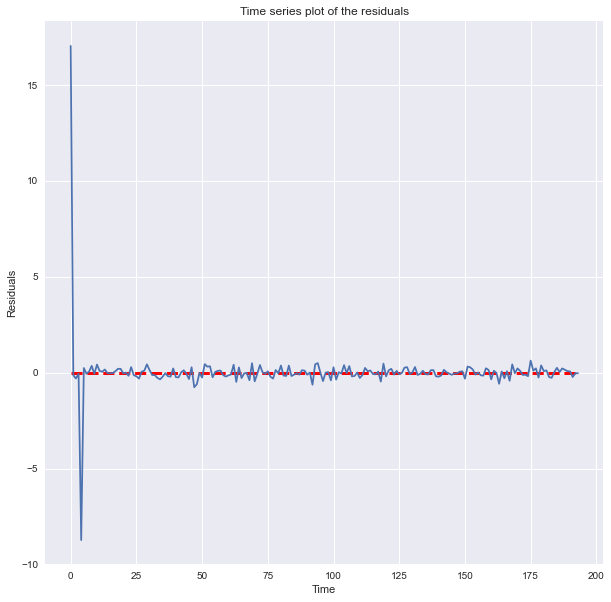

In [95]:
residuals4.index = df.index

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df.index.values, residuals4.values, '-')
ax.set(xlabel="Time", ylabel="Residuals", title="Time series plot of the residuals")

# To get the horizontal zero line
xmin = df.index.min()
xmax = df.index.max()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='red', linestyle='--', lw=3)


d:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


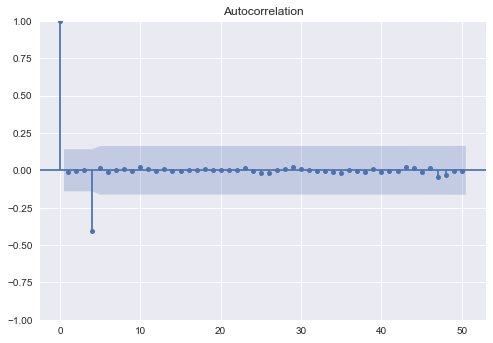

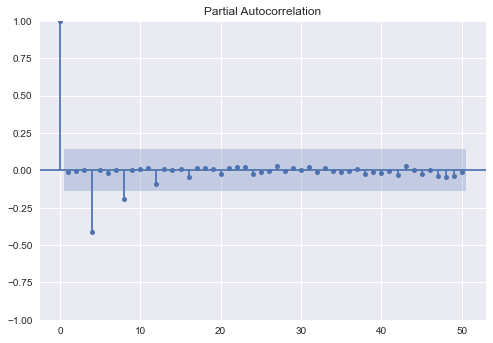

In [96]:
#To visualise the ACF, PACF plots separately, the manual codes can be used

#Creating the ACF and PACF plots of the residual series

sm.graphics.tsa.plot_acf(residuals4, lags=50);
sm.graphics.tsa.plot_pacf(residuals4, lags=50);

# In ACF, there is 1 significant lag,  so, we can add MA component up to order 1
# The significant correlations in PACF could be seen as a decreasing pattern or we can set p = 3.


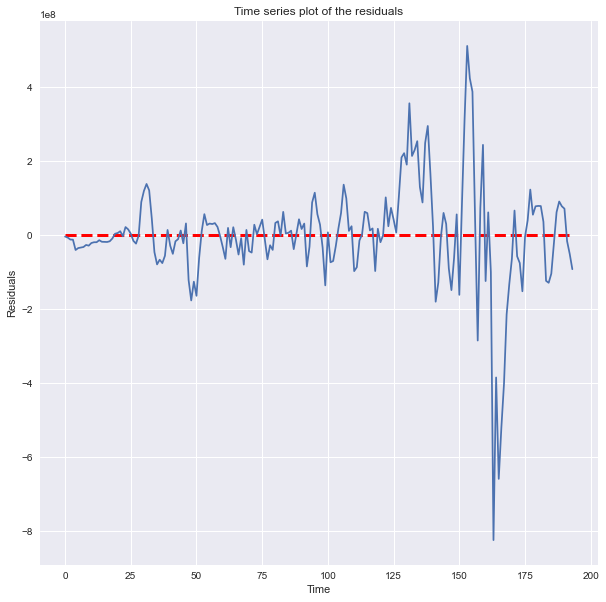

In [ ]:
residuals1.index = df.index

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df.index.values, residuals1.values, '-')
ax.set(xlabel="Time", ylabel="Residuals", title="Time series plot of the residuals")

# To get the horizontal zero line
xmin = df.index.min()
xmax = df.index.max()
ax.hlines(y=0, xmin=xmin, xmax=xmax, color='red', linestyle='--', lw=3)
